# Heatmaps Logic

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import sys
sys.path.append('../')
from utils import convert_to_heatmap_values, convert_to_pixel_values, apply_colormap, compute_score_heatmap, compute_score_probability, test_img_values, test_heatmap_values

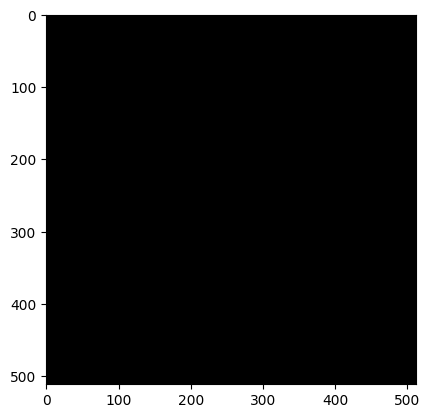

In [2]:
# Create a black image
img = np.zeros((512, 512, 3), np.uint8)
plt.imshow(img)

In [3]:
pxy = 461                           # Player coordinates
player_pos = (pxy, pxy)    # Player position
bxy = 50                                   # Ball coordinates
ball_pos = (bxy, bxy)                    # Ball position
bl_radius = 50                               # Radius of the ball landing area

## Player Heatmap

Min intensity: 0
Max intensity: 229
Player pixel value: [0 0 0]


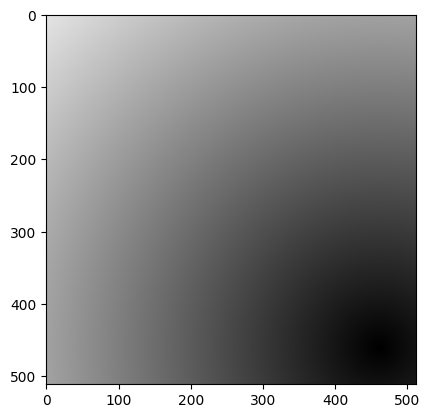

In [ ]:
# Player Heatmap
player_img = deepcopy(img)

# Approach using NumPy vectorization 
y, x = np.ogrid[:img.shape[0], :img.shape[1]]
player_distance = np.sqrt((x - player_pos[0])**2 + (y - player_pos[1])**2)

# Normalize distance to range 0-255
max_distance = np.sqrt(player_img.shape[0]**2 + player_img.shape[1]**2)
player_intensity = 255 * player_distance / max_distance

# Assign the same intensity to all three channels
player_img[:, :, 0] = player_intensity
player_img[:, :, 1] = player_intensity
player_img[:, :, 2] = player_intensity

# Print min and max intensity values
print("Min intensity:", np.min(player_img))
print("Max intensity:", np.max(player_img))

# Print the values of the pixel at the player's position
print("Player pixel value:", player_img[player_pos[1], player_pos[0]])

# Display the image
plt.imshow(player_img)

## Ball Heatmap

Min intensity: 0
Max intensity: 255
Ball pixel value: [255 255 255]


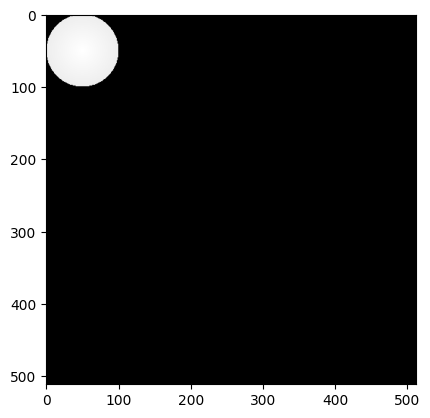

In [5]:
# Ball Heatmap
ball_img = deepcopy(img)

# Approach using NumPy vectorization (molto più veloce)
y, x = np.ogrid[:512, :512]
ball_distance = np.sqrt((x - ball_pos[0])**2 + (y - ball_pos[1])**2)

# Normalize distance to range 0-255
ball_max_distance = np.sqrt(img.shape[0]**2 + img.shape[1]**2)
ball_intensity = 255 * ball_distance / ball_max_distance

# Create a mask for the ball's distance using ball landing area
distance_mask = ball_distance >= bl_radius

# Assign the same intensity to all three channels
ball_img[:, :, 0] = ball_intensity
ball_img[:, :, 1] = ball_intensity
ball_img[:, :, 2] = ball_intensity

# Invert the intensity
ball_img = 255 - ball_img

# Apply the mask to the ball image
ball_img[distance_mask] = 0



# Print min and max intensity
print("Min intensity:", np.min(ball_img))
print("Max intensity:", np.max(ball_img))

# Print the values of the pixel at the ball's position
print("Ball pixel value:", ball_img[ball_pos[1], ball_pos[0]])

# Display the image
plt.imshow(ball_img)

## Debug

In [6]:
# Print heatmaps min-max (Pixel values)
print("Player pixel min:", np.min(player_img))
print("Player pixel max:", np.max(player_img))
print("Ball pixel min:", np.min(ball_img))
print("Ball pixel max:", np.max(ball_img))

# Print the values of the pixel at the player's position
print("Player pixel value:", player_img[player_pos[1], player_pos[0]])
# Print the values of the pixel at the ball's position
print("Ball pixel value:", ball_img[ball_pos[1], ball_pos[0]])

Player pixel min: 0
Player pixel max: 229
Ball pixel min: 0
Ball pixel max: 255
Player pixel value: [0 0 0]
Ball pixel value: [255 255 255]


In [7]:
# Scale the player heatmap to the range 0-255
player_heatmap = convert_to_heatmap_values(player_img)

# Scale the ball heatmap to the range 0-255
ball_heatmap = convert_to_heatmap_values(ball_img)

# Print heatmaps min-max (Heatmaps values)
print("Player heatmap min:", np.min(player_heatmap))
print("Player heatmap max:", np.max(player_heatmap))
print("Ball heatmap min:", np.min(ball_heatmap))
print("Ball heatmap max:", np.max(ball_heatmap))

# Print the values of the heatmap at the player's position
print("Player heatmap value:", player_heatmap[player_pos[1], player_pos[0]])
# Print the values of the heatmap at the ball's position
print("Ball heatmap value:", ball_heatmap[ball_pos[1], ball_pos[0]])


Player heatmap min: 0.0
Player heatmap max: 0.8980392
Ball heatmap min: 0.0
Ball heatmap max: 1.0
Player heatmap value: [0. 0. 0.]
Ball heatmap value: [1. 1. 1.]


## Score Heatmap

Score probability: 94.31%
Score: True


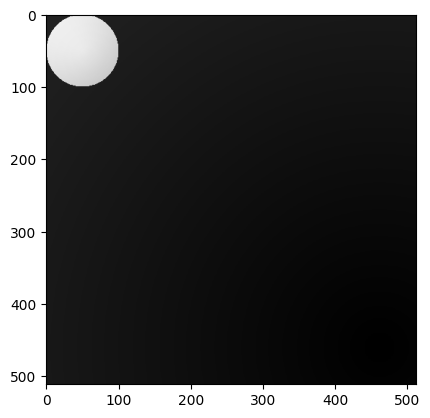

In [8]:
# Score heatmap
score_heatmap = compute_score_heatmap(player_heatmap, ball_heatmap)

# Display the score heatmap
score_probability = compute_score_probability(score_heatmap)
print(f"Score probability: {score_probability:.2f}%")

score = True if score_probability > 50 else False
print(f"Score: {score}")

score_img = convert_to_pixel_values(score_heatmap)

# Display the score image
plt.imshow(score_img)


## Heatmap Comparison

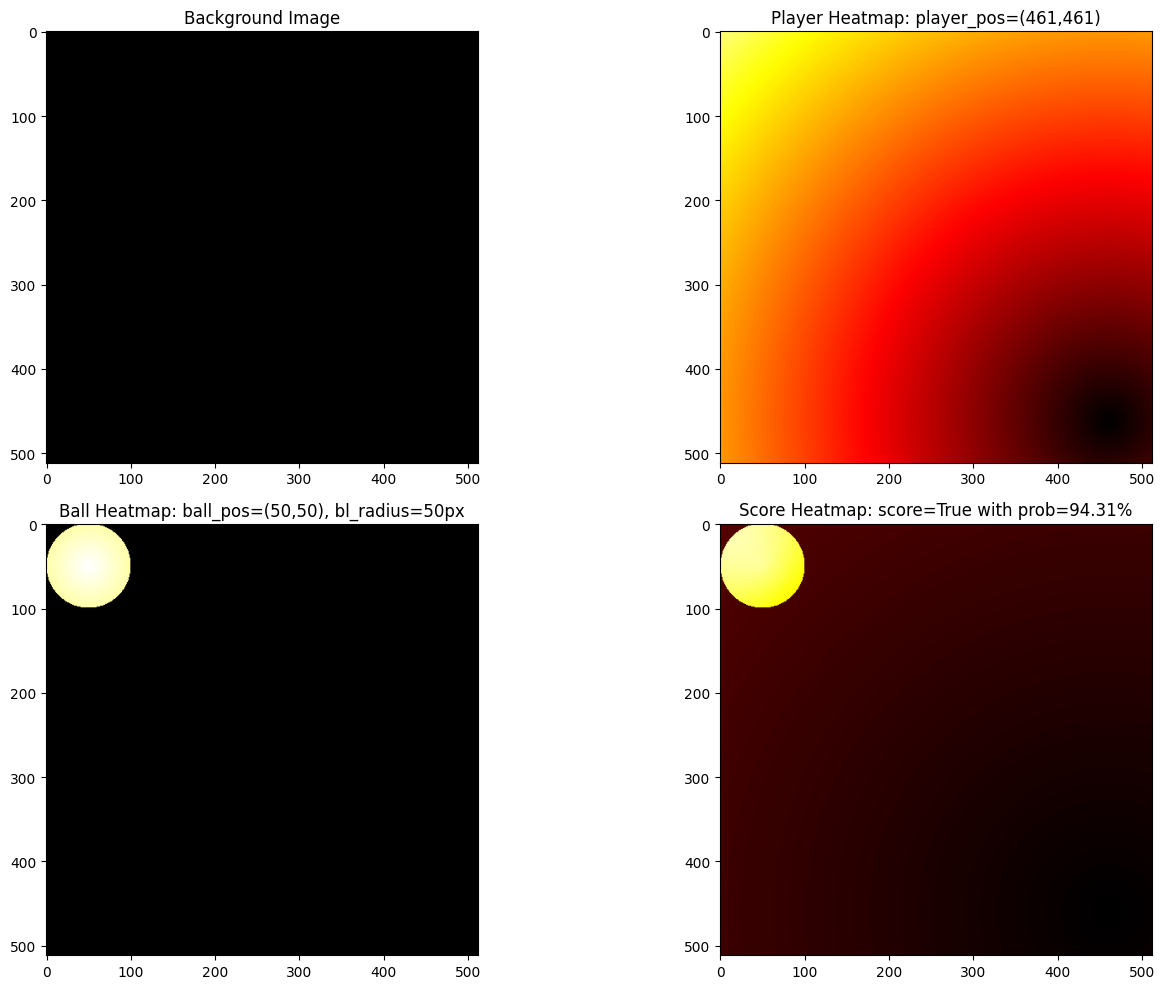

In [9]:
# Colorize the heatmaps
colored_player_heatmap = apply_colormap(player_img)
colored_ball_heatmap = apply_colormap(ball_img)
colored_score_heatmap = apply_colormap(score_img)

# Visualize the heatmaps
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Background Image")
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.title(f"Player Heatmap: player_pos=({player_pos[0]},{player_pos[1]})")
plt.imshow(colored_player_heatmap)

plt.subplot(2, 2, 3)
plt.title(f"Ball Heatmap: ball_pos=({ball_pos[0]},{ball_pos[1]}), bl_radius={bl_radius}px")
plt.imshow(colored_ball_heatmap)

plt.subplot(2, 2, 4)
plt.title(f"Score Heatmap: score={score} with prob={score_probability:.2f}%")
plt.imshow(colored_score_heatmap)

plt.tight_layout()
plt.show()